# Evaluación final. Evaluación del desarrollo de mis competencias.


Melanie Juarez Alvarado A01730550 

Introducción:
Los incendios forestales son un problema medioambiental importante, ya que aparte de causar daños económicos, también ponen en peligro la vida de muchas especies.


Por esta razón, es importante contar con equipos especializados en su detección como herramientas automáticas basadas en sensores locales o realizar predicciones para controlar este fenómeno.


En este entregable se usará una base de datos multivariante para responder preguntas acerca de los incendios forestales en la región noreste de Portugal, mediante el uso de datos meteorológicos.

# Variables

In [22]:
import pandas as pd # linea para importar la biblioteca de pandas
df = pd.read_csv('forestfires.csv') # Leer el archivo csv y se guarde en la variable df
column_names = list(df.columns) #Hace una lista con  las columnas del archivo y las guarda en la varaible column_names
print(column_names) #Muestra el nombre de las columnas en forma de lista

['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


Las variables de este problema son las anteriores mostradas y estas tienen los siguientes atributos:
 

X - coordenada espacial del eje x dentro del mapa del parque Montesinho: 1 a 9  (Discreto)

Y - coordenada espacial del eje y dentro del mapa del parque Montesinho: 2 a 9 (Discreto)

Month- mes del año: 'jan' a 'dic' (Categórico)

Day- día de la semana: 'lun' a 'sun' (Categórico)

FFMC - Índice FFMC del sistema FWI: 18,7 a 96,20DMC (Categórico)

Índice DMC del sistema FWI: 1.1 a 291.3 Índice CC (Categórico)

CC del sistema FWI: 7,9 a 860,6 (Categórico)

ISI - Índice ISI del sistema FWI: 0.0 a 56.10 (Categórico)

Temp - temperatura en grados Celsius: 2.2 a 33.30 (Continuo)

RH - humedad relativa en%: 15.0 a 100 ( continuo)

Wind - velocidad del viento en km / h: 0,40 a 9,40 (Continuo)

Rain - lluvia exterior en mm / m2: 0,0 a 6,4 (Continuo)

Área - el área quemada del bosque (en ha): 0.00 a 109.08(Continuo)


# Comportamientos entre variables

In [23]:
df.corr() #Se calcula la correlación entre las variables

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


Aquí se muestra la correlación entre las variables. Si la correlación está entre -1 y 1, se tiene una correlación fuerte, mientras que si se tiene una correlación pegada a 0, quiere decir que es una correlación débil. Un punto importante que se tiene que tomar en cuenta es que una correlación no te muestra la causa-efecto.

# Preguntas a responder

 - ¿En qué mes hay más incendios y cómo son sus condiciones meteorologicas a comparación de otros meses?

In [24]:
#No se puede usar histograma porque no tiene valor numerico. Si se quiere usar, tengo que transformarlo a valores. 
df.groupby(["month"]).size() #Lee la variable de columna y le pone el tamaño dependiendo a los datos de tu variable.

month
apr      9
aug    184
dec      9
feb     20
jan      2
jul     32
jun     17
mar     54
may      2
nov      1
oct     15
sep    172
dtype: int64

In [25]:
pd.pivot_table(df, #generar una pivot table con la base de datos que tenemos 
               index =["month"], #los renglones van a mostrar los meses, ese es el indice
               values = ["temp",'RH','wind','rain'], #los valores que se van a mostrar son de las columas entre corchetes
               aggfunc= 'mean',#El promedio de los valores es lo que se va a mostrar en la pivot table
               margins=True #El margen da el "ALL" del promedio en este caso de las columnas
              )

,RH,rain,temp,wind
month,,,,
apr,46.888889,0.000000,12.044444,4.666667
aug,45.489130,0.058696,21.631522,4.086413
dec,38.444444,0.000000,4.522222,7.644444
feb,55.700000,0.000000,9.635000,3.755000
jan,89.000000,0.000000,5.250000,2.000000
jul,45.125000,0.006250,22.109375,3.734375
jun,45.117647,0.000000,20.494118,4.135294
mar,40.000000,0.003704,13.083333,4.968519
may,67.000000,0.000000,14.650000,4.450000


Resultado: El mes de agosto es el mes con mayor cantidad de incendios.
A comparación de otros meses, este mes es de los 3 meses con mayores temperaturas en el año, es de los meses con mayor cantidad de lluvia en mm / m2, su velocidad del viento es el 7mo más pequeño, y su humedad relativa es la 4ta más grande.

- ¿En días con una temperatura baja (de entre 0 a 15 grados) también hay incendios?

In [26]:
def create_category(ranking): #Se crea una función
    if (ranking>=0) &(ranking<=15):
        return "Dias frios" #Se usa if para poner una condición. En este caso if nos ayuda a que la columna 
    #rank vaya adquiriendo diferentes etiquetas al momento de que se cumpla con la condición. 
    elif (ranking >15) &(ranking<=25):
        return "Dias normales"
    elif (ranking>25) &(ranking<=30):
        return "Dias calurosos"
    else: #Si ninguna de estas condiciones anteriores se cumple, con ayuda del elif se coloca la ultima condición. 
        "Dias super calurosos "

In [27]:
df["rank"]=df["temp"].apply(lambda x:create_category(x)) #Con esto se crea una nueva categoria (columna) 
                                                         #en la base de datos.
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,rank
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,Dias frios
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,Dias normales
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,Dias frios
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,Dias frios
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,Dias frios
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,Dias calurosos
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,Dias normales
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,Dias normales
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,Dias calurosos


In [28]:
 df.groupby(["rank"]).size() #Con esto se contabiliza la columna rank dependiendo a sus datos. 

rank
Dias calurosos     52
Dias frios        113
Dias normales     339
dtype: int64

Efectivamente existen incendios inclusive si la temperatura es baja. De hecho se puede observar que en el año, hay más dias frios(de entre 0 a 15 grados) con incendios, que dias calurosos (de entre 25 a 30 grados) con incendios. 

- ¿Entre más suba la temperatura, mas hectareas se queman?¿Se puede predecir cuantas hectareas se queman gracias a la temperatura'

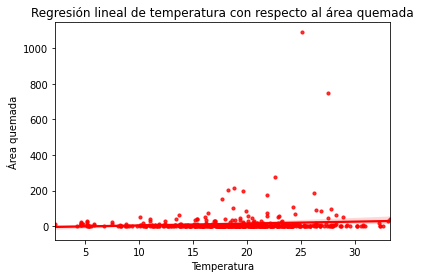

In [29]:
import seaborn as sns #Es un complemento de Matplotlib y se dirige específicamente a la visualización de datos estadísticos
import matplotlib.pyplot as plt #Sirve para acceder a la biblioteca de matplotlib y así visualizar mejor la informacion 
tempplot= sns.regplot(x="temp",  #el eje x va a estar dado por los valores de la temperatura
                     y="area", #el eje y va a estar dado por los valores del area
                     data=df, #Es la base de datos que se va a utilizar
                     color="r", #El color que va a ser el gráfico, en este caso r = rojo
                     marker="o", #El color que va a ser el gráfico, en este caso r = rojo
                     scatter_kws={"s":10}) #El tamaño de tus marcas 
#Los labels de tu gráfico
tempplot.set(xlabel="Temperatura",
      ylabel="Área quemada")
#El título de tu gráfico
tempplot.set_title("Regresión lineal de temperatura con respecto al área quemada")
plt.show() #mostrar tu gráfico

In [30]:
X=df["temp"].values #Valores en x
Y=df['area'].values #Valores en y
import statsmodels.api as sm #Biblioteca para poder mostrar modelos estadisticos

model=sm.OLS.from_formula("Y~X", #y=b0+b1*x
                         data=df)
result=model.fit() #Hacer el ajuste de modelo 
result.summary() #Mostrar la anova y el resumen de lo que se obtuvo 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     211.5
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           2.17e-40
Time:                        21:24:44   Log-Likelihood:                -751.14
No. Observations:                 517   AIC:                             1506.
Df Residuals:                     515   BIC:                             1515.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9607      0.103     28.814      0.000       2.759       3.163
X              0.2868      0.020     14.543      0.000       0.248       0.326
==============================================================================
Omnibus:                        7.186   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                7.067
Skew:                           0.259   Prob(JB):                       0.0292
Kurtosis:                       3.244   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Se puede ver que se tiene una r cuadrada de 0.291, esto quiere decir que solo el 29.1% de las observaciones se ajusta a la regresión, por lo tanto no se puede predecir el numero de hectareas quemadas con la temperatura. Hay que recalcar que tampoco existe una relación entre la temperatura y la cantidad de hectareas que se quemaron. 

# Stakeholders interesados

Gobierno, protección civil, bomberos, parques que también tengan gran cantidad de incendios en el año, comunidades aledañas,  reservas naturales y sus cuidadores. 

# Visualizaciones de datos (diagrama de caja y gráfico circular)

¿Cuando hay incendios forestales existen vientos con velocidades extrañamenta altos o bajos (Valores atipicos) o se mantienen similares?

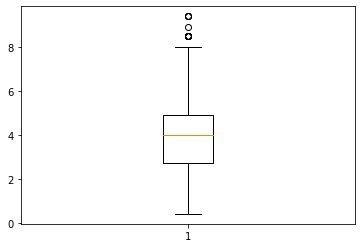

In [31]:
import matplotlib.pyplot as plt #Sirve para acceder a la biblioteca de matplotlib y así visualizar mejor la informacion
plt.boxplot(df['wind'])# hacer el boxplot con los valores de la variable de viento 
plt.show() # Mostrar el boxplot

Se puede observar que existen valores atipicos en la parte superior del boxplot, esto quiere decir que en algunos incendios el viento adquiere una velocidad del viento en km / h mas elevada.  

- ¿Cuales son los valores de las condiciones meteorológicas más frecuentes en los incendios?

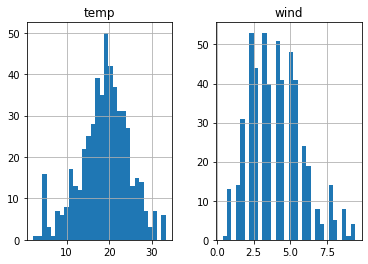

In [32]:
pd.DataFrame.hist(data=df, #Sirve para hacer un histograma y toma los valores de la base de datos
                  bins=30, #El número de barras que forma
                  column=['temp','wind']) #Los datos de las variables que va a tomar. Asi los gráficos salen uno a 
                  #lado del otro 
plt.show() # Mostrar el histograma

Con esto se puede estimar que en el rango de temperatura que más se repite en los incendios es entre 19 y 20 grados; en el viento es de 2.2 a 2.5 km / h 

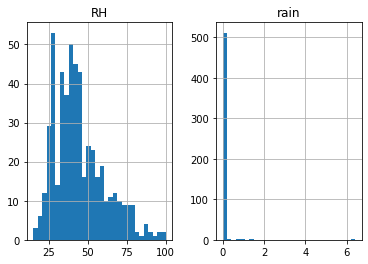

In [33]:
pd.DataFrame.hist(data=df,
                  bins=30,#El número de barras que forma
                  column=['RH','rain']) #Los datos de las variables que va a tomar.
plt.show()# Mostrar el histograma

Con esto se puede estimar que en el rango de RH que más se repite en los incendios es entre 26.25 y 27.50 porciento, y en la cantidad de lluvia es de 0 mm / m2

# Conclusiones:

Con esta base de datos se pueden obtener los factores que afectan al entorno y que provocan un incendio, sin embargo, hay que mencionar que el modelo que predice futuros incendios no es lineal.De igual manera el modelo se pudo observar que la variable de hectareas quemadas no tiene correlación con las condiciones meteorologicas presentes, por lo que se recomeinda que se transformen los datos y se utilice un modelo SVM para predecir incendios pequeños. 

Con esta actividad aprendí a aplicar los codigos vistos en clase en un situación real e interpretar los datos que se visualizaban en la pantalla; de nada te sirve tener resultados en tablas o en graficos si no sabes que significan. 

De igual manera considero que esta actividad me ayudó en la toma de desiciones y pensar mas a fondo en cómo plasmar mis ideas de resolución de problemas en un código. 

En lo personal fue un gran reto porque no soy experta en python, por lo que muchas veces sabia cómo resolverlo mas no cómo ponerlo en código, por lo que deje de pensar de una sola forma y pensé en otras formas de llegar a la solución que queria mostrar. 